In [8]:
from obspy import read_events 
from obspy.clients.fdsn import Client
import datetime
from obspy import UTCDateTime

In [9]:
catalog = read_events ("http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.quakeml")

In [11]:

import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [12]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')


In [12]:
# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

In [13]:
for item in range(len(catalog)):
    magnitudes.append(catalog[item].magnitudes[0].mag)
    lats.append(catalog[item].origins[0].latitude)
    lons.append(catalog[item].origins[0].longitude)
    timestrings.append(catalog[item].origins[0].time)

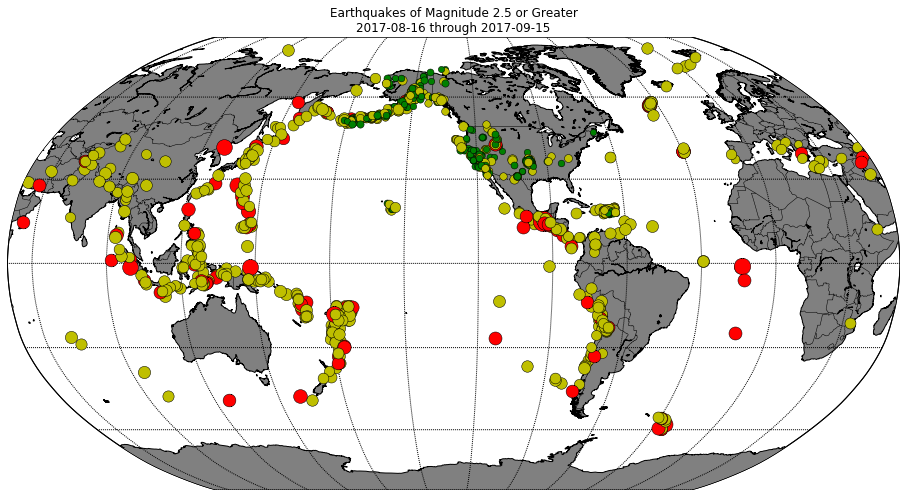

In [14]:
# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,lat_0=0, lon_0=-130)
              
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
starttime =  timestrings[-1].date
endtime =  timestrings[0].date
title_string = "Earthquakes of Magnitude 2.5 or Greater\n"
title_string += "%s through %s" % (starttime, endtime)
plt.title(title_string)

plt.show()

In [22]:
client = Client("IRIS")
t = UTCDateTime("2017-01-01T00:00:00")
#get_events(self, starttime, endtime, minlatitude, maxlatitude, minlongitude,
# maxlongitude, latitude, longitude, minradius, maxradius, mindepth, maxdepth, minmagnitude, maxmagnitude, magnitudetype, includeallorigins, includeallmagnitudes, includearrivals, eventid, limit, offset, orderby, catalog, contributor, updatedafter, filename, **kwargs)
catalog = client.get_events(minmagnitude=5,latitude=28,longitude=104,minradius=5,maxradius=35,starttime=t)
print catalog


203 Event(s) in Catalog:
2017-09-15T12:37:01.440000Z |  +1.591,  +99.486 | 5.0 mb
2017-09-11T17:35:09.620000Z | +23.953, +142.337 | 5.7 Mww
...
2017-01-01T14:12:05.720000Z |  +3.636, +128.591 | 5.2 Mwb
2017-01-01T00:13:25.380000Z |  +2.833, +127.579 | 5.0 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [ ]:
catalog.plot()

In [15]:
class Price(object):
    a = 40
    def _init_(self):
        self.price = 100
        self.count = 0.7
    def price(self):
        new_price = self.price * self.count
        return new_price
    

In [16]:
p = Price()

In [17]:
p.price

<bound method Price.price of <__main__.Price object at 0x00000000058DE080>>

In [18]:
p.a

40

In [6]:
# 导入 matplotlib 的所有内容（nympy 可以用 np 这个名字来使用）
from pylab import *

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

In [27]:
# 创建一个 8 * 6 点（point）的图，并设置分辨率为 80
figure(figsize=(5,7), dpi=100)

# 创建一个新的 1 * 1 的子图，接下来的图样绘制在其中的第 1 块（也是唯一的一块）
subplot(2,1,1)

# 绘制余弦曲线，使用蓝色的、连续的、宽度为 1 （像素）的线条
plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# 绘制正弦曲线，使用绿色的、连续的、宽度为 1 （像素）的线条
plot(X, S, color="green", linewidth=1.0, linestyle="-")

# 设置横轴的上下限
xlim(-4.0,4.0)

# 设置横轴记号
xticks(np.linspace(-4,4,9,endpoint=True))

# 设置纵轴的上下限
ylim(-1.0,1.0)

# 设置纵轴记号
yticks(np.linspace(-1,1,5,endpoint=True))

# 以分辨率 72 来保存图片
# savefig("exercice_2.png",dpi=72)



subplot(2,1,2)
plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plot(X, S, color="red",  linewidth=2.5, linestyle="-")

xlim(X.min()*1.1, X.max()*1.1)
ylim(C.min()*1.1, C.max()*1.1)

xmin ,xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()

dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2

xlim(xmin-np.pi/2 , xmax+np.pi/2 )
ylim(ymin - dy, ymax + dy)


xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
yticks([-1, 0, +1])

xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])


([<matplotlib.axis.YTick at 0xb85dcf8>,
 <a list of 3 Text yticklabel objects>)

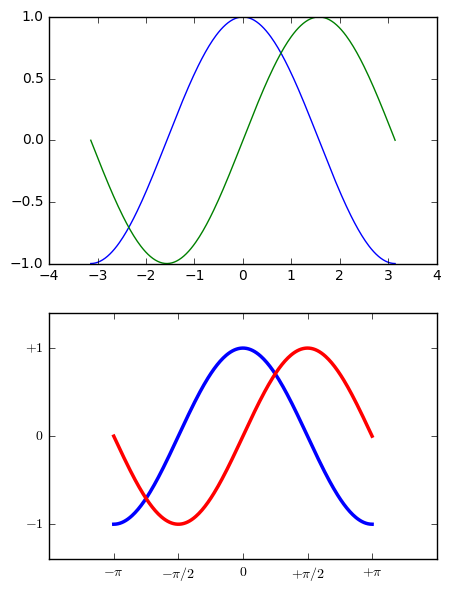

In [28]:
# 在屏幕上显示
show()

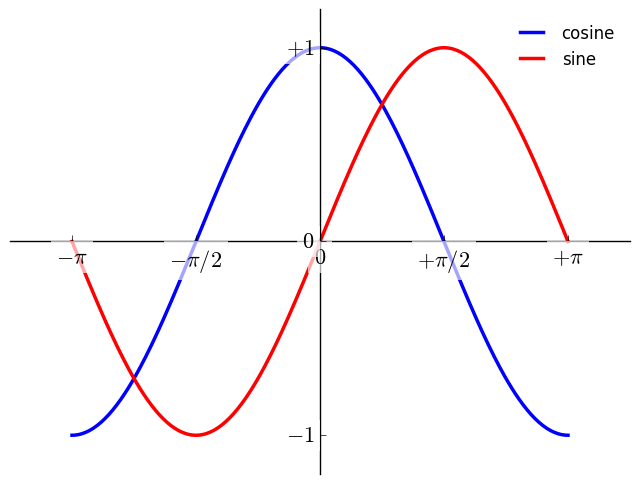

In [57]:
figure(figsize=(8,6), dpi=100)

plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

legend(loc='upper left')

xlim(X.min()*1.1, X.max()*1.1)
ylim(C.min()*1.1, C.max()*1.1)

xmin ,xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()

dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2

xlim(xmin - np.pi/4 , xmax + np.pi/4)
ylim(ymin - 0.2, ymax + 0.2)


xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
yticks([-1, 0, +1])

xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='upper left')
plt.legend(framealpha=0.0)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))


show()

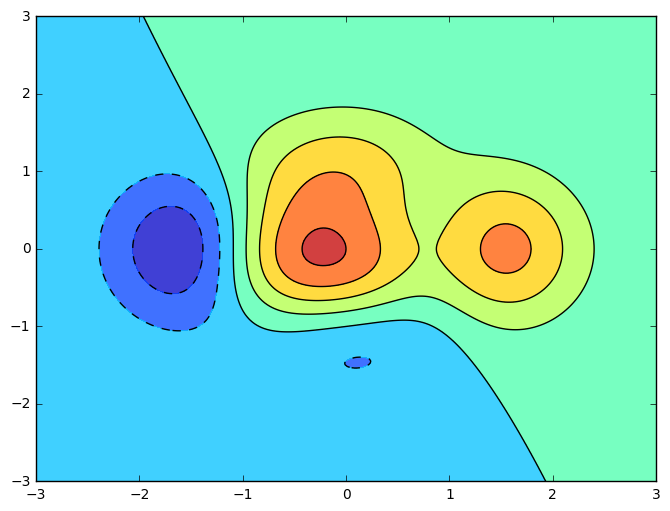

In [59]:
from pylab import *

def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

figure(figsize=(8,6), dpi=100)

contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
show()

In [62]:
flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]

In [64]:
a = [1, 2, [3, 4], [[5, 6], [7, 8]]]
flatten(a)

[1, 2, 3, 4, 5, 6, 7, 8]

In [66]:
ord('*')

42

In [ ]:
r